In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



In [3]:
df_o = pd.read_csv("data/Train.csv")
df_o.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0


DATOP - Date of flight,
FLTID - Flight number,
DEPSTN - Departure point,

ARRSTN - Arrival point,
STD - Scheduled Time departure,
STA - Scheduled Time arrival,

STATUS - Flight status,
AC - Aircraft Code,

In [27]:
df = df_o.copy()
df.STD = pd.to_datetime(df.STD, format = '%Y-%m-%d %H:%M:%S') 
df.DATOP = pd.to_datetime(df.DATOP, format = '%Y-%m-%d') 
df.STA = pd.to_datetime(df.STA, format = '%Y-%m-%d %H.%M.%S') 
# df2["flight_month"]=df2["STD"].dt.month
# df2["flight_year"]=df2["STD"].dt.year
df['departure_time'] = df.STD.dt.hour  * 60 + df.STD.dt.minute # departure time in minutes
df['duration'] = df.STA - df.STD
df = df[df['duration']< '1 days']
df = df[df.target < 60*12]
df['departure_month'] = df.STD.dt.month
df['departure_year'] = df.STD.dt.year
df['day_of_week'] = df.STD.dt.day_of_week
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 107022 entries, 0 to 107832
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   ID               107022 non-null  object         
 1   DATOP            107022 non-null  datetime64[ns] 
 2   FLTID            107022 non-null  object         
 3   DEPSTN           107022 non-null  object         
 4   ARRSTN           107022 non-null  object         
 5   STD              107022 non-null  datetime64[ns] 
 6   STA              107022 non-null  datetime64[ns] 
 7   STATUS           107022 non-null  object         
 8   AC               107022 non-null  object         
 9   target           107022 non-null  float64        
 10  departure_time   107022 non-null  int32          
 11  duration         107022 non-null  timedelta64[ns]
 12  departure_month  107022 non-null  int32          
 13  departure_year   107022 non-null  int32          
 14  day_of_we

Text(0.5, 0, 'departure_time [minutes]')

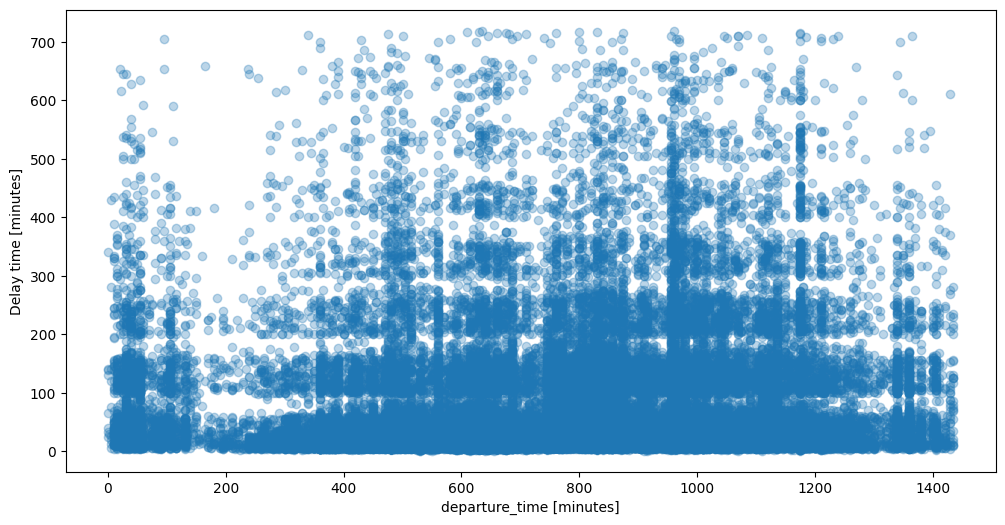

In [5]:
plt.figure(1, figsize=(12,6))
plt.scatter(df[df.target>0].departure_time, df[df.target>0].target,  alpha = 0.3)
# plt.title(label)
plt.ylabel('Delay time [minutes]')
plt.xlabel('departure_time [minutes]')
# plt.legend()


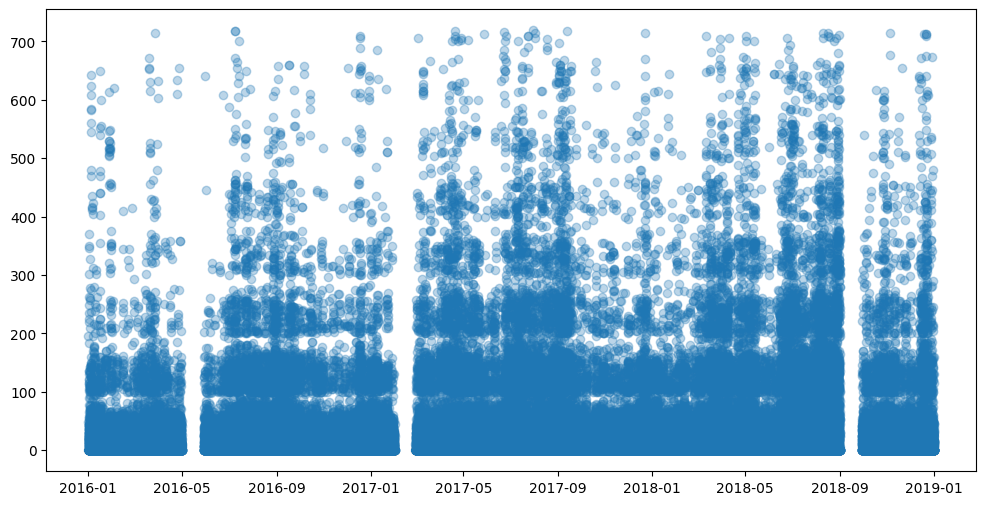

In [18]:
fig= plt.figure(1, figsize=(12,6))
plt.plot_date(df.STD, df.target, fmt='o',alpha=0.3)
# plt.plA, df.target, fmt='bo',alpha=0.2)

Text(0.5, 0, 'arrival data')

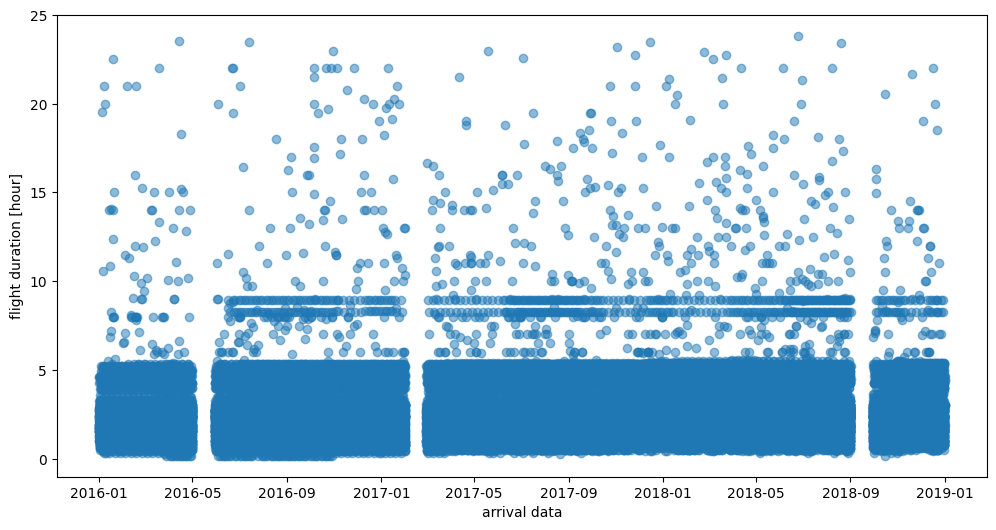

In [7]:
fig = plt.figure(1, figsize=(12,6))
plt.plot_date(df.STA, df.duration.dt.total_seconds()/3600, fmt='o',alpha=0.5)
plt.ylabel('flight duration [hour]')
plt.xlabel('arrival data')


Text(0.5, 0, 'departure_month')

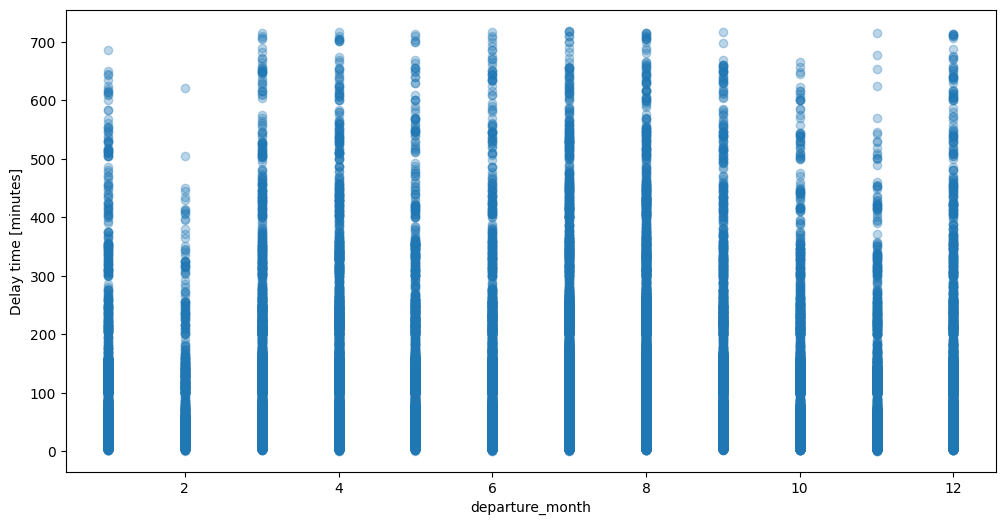

In [8]:
plt.figure(1, figsize=(12,6))
plt.scatter(df[df.target>0].departure_month, df[df.target>0].target,  alpha = 0.3)
# plt.title(label)
plt.ylabel('Delay time [minutes]')
plt.xlabel('departure_month')

In [9]:
# pd.set_option('display.max_rows', None)
df[df.STA > '2019-01-30']
# df[df.STA > '2018-12-30'].shape

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,departure_time,duration,departure_month,departure_year,day_of_week


In [28]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
df['flight_id'] = label_encoder.fit_transform(df['FLTID'])
df['departure_port'] = label_encoder.fit_transform(df['DEPSTN'])
df['arrival_port'] = label_encoder.fit_transform(df['ARRSTN'])
df['status'] = label_encoder.fit_transform(df['STATUS'])
df['aircraft_code'] = label_encoder.fit_transform(df['AC'])

df['duration_min'] =df.duration.dt.total_seconds()/60

In [36]:
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,duration,departure_month,departure_year,day_of_week,flight_id,departure_port,arrival_port,status,aircraft_code,duration_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,0 days 02:25:00,1,2016,6,224,31,119,0,46,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,...,0 days 01:50:00,1,2016,2,248,86,119,0,28,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,0 days 02:35:00,1,2016,5,82,123,58,0,46,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,0 days 02:50:00,1,2016,6,158,37,91,0,50,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,...,0 days 01:20:00,1,2016,6,130,123,4,0,34,80.0


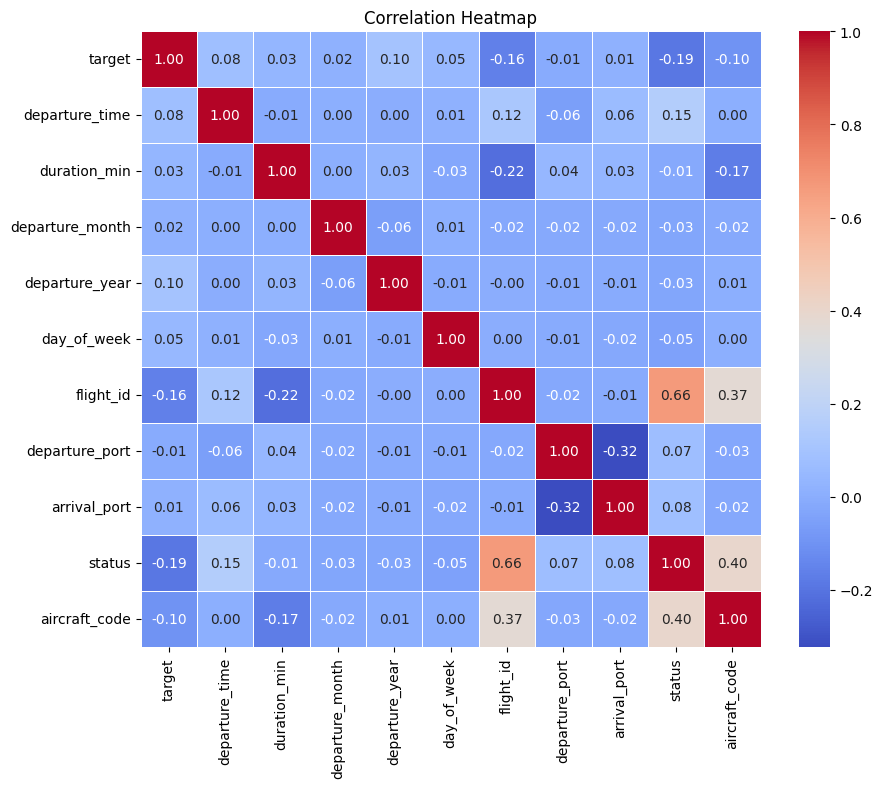

In [29]:
import seaborn as sns
corr = df[['target', 'departure_time', 'duration_min', 'departure_month',
       'departure_year', 'day_of_week', 'flight_id', 'departure_port',
       'arrival_port', 'status', 'aircraft_code']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
X = df[[ 'departure_time', 'duration_min', 'departure_month',
       'departure_year', 'day_of_week', 'flight_id', 'departure_port',
       'arrival_port', 'status', 'aircraft_code']]

X.head()
y = df.target


## Splitting data for testing 

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=88)

## Trainining the model

In [13]:
## in order to exemplify how the predict will work.. we will save the y_train
# X_test.to_csv("data/X_test.csv")
# y_test.to_csv("data/y_test.csv")

In [33]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [34]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(np.sqrt(mse))

82.63899558767375


In [35]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(np.sqrt(mse))

81.52868495103114
